# Hypothesis Testing

## Lecture for Galvanize DSI

#### Mark Llorente
#### From Dan Wiesenthal's and Darren Reger's Excellent Slides (and a Couple Borrowed Cells from Papa Moses)

# Objectives - Morning

- Understand the difference between estimation and hypothesis testing 
- Be able to perform a hypothesis test
- Discuss the differences between Type I & Type II error
- Know when to use a 1-tailed vs. 2-tailed test
- Be able to compare means and proportions
- Test multiple hypotheses correctly

# Story Time
- Does tea taste different if the milk was poured in first?
- Fisher and his *improbably lucky* colleague, Muriel Bristol
- Fisher and his rejection of the null hypothesis
- "You're either the luckiest woman in the world, or you can actually tell the difference."
- ... what if she had gotten 19 right? 18? ...12?
- ... what if it was 5,500/10,000?

# Central Limit Theorem

- Under certain conditions, the **mean** of a sufficiently large number of i.i.d. random variables will be approximately normal, **regardless** of the underlying distribution.
- This can allow us to do hypothesis testing, because we can use the sample to ask whether our data was likely to have been drawn from the hypothesized distribution.

<img src='clt.png'></img>

# Central Limit Theorem

Not only is the sample mean normally distributed, we also have:

$\bar{X} $~$ Normal(\mu,\frac{\sigma^2}{n})$

Like any other normal random variable, we can derive a standard normal Z-score:

$Z = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$

### Review of CLT

The **central limit theorem** asserts that as we take the mean of larger and larger samples, the distribution of sample means becomes more and more normal.

Said differently, probabilistic statements about the mean of a large sample can be well approximated by assuming that the distribution of the sample means is a normal distribution with the mean $\bar{x}$ and variance $\frac{s^2}{N}$

/home/markcatalysis/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


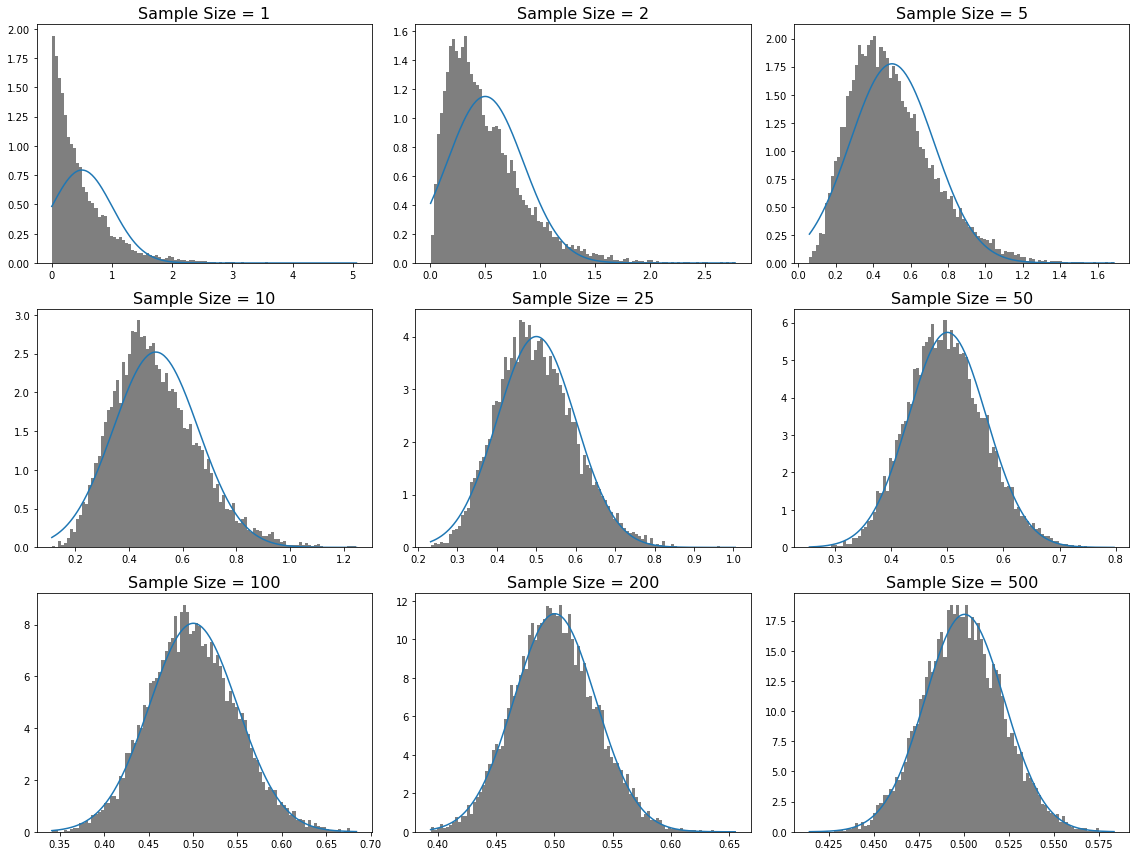

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import pandas as pd

size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200, 500]
lam = 2
population = scs.expon(scale=1/lam)

sample_means = [population.rvs(100).mean() for _ in range(10000)]
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)

sample_means_model = scs.norm(mean_sample_means, 
                                np.sqrt(variance_sample_means))

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = [population.rvs(sample_size).mean() for _ in range(10000)]
    variance_sample_means = np.var(sample_means)
    sample_means_model = scs.distributions.norm(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, normed=True, color="black", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t))
    _ = ax.set_title("Sample Size = {}".format(sample_size), fontsize=16)
fig.tight_layout()

### Statement of the Central Limit Theorem

Suppose $X_1, X_2, \ldots$ are i.i.d. copies of a random variable with finite expectation and variance

$$ E[X_1] = E[X_2] = \cdots = \mu $$
$$ Var(X_1) = Var(X_2) = \cdots = \sigma^2 $$

Then the distribution of sample means tends to a normal distribution with the appropriate mean and standard deviation:

$$ \frac{X_1 + X_2 + \cdots + X_k}{k} \rightarrow N \left( \mu, \frac{\sigma}{\sqrt{k}} \right) $$

as $k \rightarrow \infty$.

**Note:** The CLT also applies to a simple sum, though the mean and variance are different

$$ X_1 + X_2 + \cdots + X_k \rightarrow N \left( k \mu, \sqrt{k} \sigma \right) $$

The type of convergence is the CLT is called [convergence in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution).

A couple of notes

  - The stunning part of the central limit theorem is that it makes almost no assumptions about $X$.  $X$ can be anything, and its sample means will always tend toward normality.
  - The central limit theorem is a **miracle**, pure and simple.  There is no real *reason* it is true, it just is.  Consider it a gift of rare order in the universe, more like a fundamental law of physics than an intuitive mathematical fact.
  - Here's an elevator pitch statement of the central limit theorem, good for job interviews: **The central limit theorem allows us to make probabilistic statements about the sample mean from any population using the normal distribution.**

### Example: The Binomial Distribution

Consider a binomial distribution $Binom(n, p)$, which assigns probabilities to the number of heads shown in $n$ flips of a coin where the probability of seeing a head in a **single flip** is $p$.

Consider a variable $X$ which is distributed as binomial

$$ X \sim Binom(n, p) $$

and also a ton of variables representing **single coin flips**

$$ X_1, X_2, \ldots \sim Binom(1, p) $$

**Claim:** $X \sim X_1 + X_2 + \cdots + X_n$

**Question:** Why?

The central limit theorem has an immediate consequence:  Binomial distributions with large $n$ tend to be approximately normal!

$$ Binom(n, p) \sim N(np, \sqrt{n p (1 - p)} ) $$

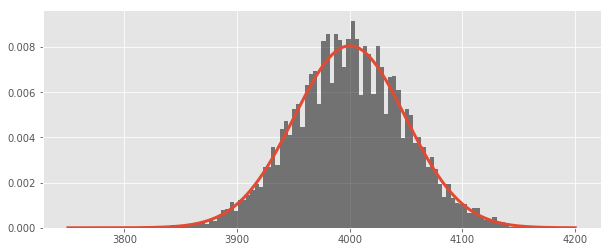

In [40]:
binomial = scs.binom(10000, 0.4)
binomial_sample = binomial.rvs(10000)

binomial_sample_mean = np.mean(binomial_sample)
binomial_sample_variance = np.var(binomial_sample)
normal_approx = scs.norm(binomial_sample_mean, np.sqrt(binomial_sample_variance))

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(binomial_sample, bins=100, normed=True, color="black", alpha=0.5)
x = np.linspace(3750, 4200, num=250)
ax.plot(x, normal_approx.pdf(x), linewidth=3);

An immediate consequence: Binomial probabilities with large $n$ can be well approximated using the normal distribution.

#### Important Note

The central limit theorem lets us make probabilistic statements about a very specific sample statistic: the sample mean.  Because of this, much emphasis is placed on the sample mean in many courses on statistics.

**The sample mean is not the only important statistic**, if you are trying to estimate hurricane losses, the mean loss is probably not as important as, say, the *maximum possible loss*.  The central limit theorem has **nothing** to say about this situation.

The central limit theorem is an important tool, but it is not **general**.  Other tools would be rightfully viewed as more important, i.e. bootstrapping.

### The Central Limit Theorem: The Point

When we are concerned with a **sample mean**, the central limit theorem lets us derive the **actual distribution of the sample mean**.  This allows us to calculate probabilities about the sample mean.

# Estimation vs. Hypothesis Testing

## Estimation
- The value of the parameter is unknown
- Goal is to find a point estimate and confidence interval for likely value of the parameter

## Hypothesis Testing
- The value of the parameter is stated... *as our hypothesis*
- Goal is to determine how reasonable/unreasonable this value is
- We have a *specific question we are trying to answer*, which we phrase as a hypothesis

# Null Hypothesis vs. Alternative Hypothesis

## Null Hypothesis
- Typically a measure of the status quo (assume no effect)

## Alternative Hypothesis
- Typically the effect a researcher hopes to measure

### Goal: falsify the status quo

#### Innocent ($H_0$) until proven guilty ($H_1$)

<img src="Hyp1.png">

# Hypothesis Testing Steps

1. State the null ($H_0$) and the alternative ($H_1$) hypotheses
2. Choose a level of significance $\alpha$
    - Threshold used to determine whether we reject or fail to reject the null hypothesis
    - Probability of rejecting the null when it is in fact true
3. Choose an appropriate statistical test
4. Find the test statistic
4. Compare the test statistic we found to the critical value and draw conclusions
    - Reject $H_0$ in favor of $H_1$
    - Fail to reject $H_0$


# Type I vs. Type II Error

**Employers ask this**

Type I error:    P(Type I) = P(Reject $H_0$ | $H_0$ is true) 

Type II error:   P(Type II) = P(Fail to Reject $H_0$ | $H_0$ is false)

<img src='error_type.png'>

If the null hypothesis were true, we would live in the world of the left curve. But, even living in that happy $H_0$ status-quo world, there are still some times we'll get values so far to the right that we'll think we're living in bizarro $H_1$ world.  We might then reject the null in error, which is a false positive.  We thought we were in $H_1$, but we weren't; this is Type I error.  Today's material talks about $\alpha$; tomorrow when we talk about Power we'll talk about $\beta$ and Type II error.

# 1 vs. 2 Tailed Tests

- P-value: 
    - Probability of observing the data we observed, or more extreme, given that the null hypothesis is true.
    - Did we just have bad luck?
- Three questions we can ask:
    - Is the parameter simply different?
        - I think the average height is 5 foot 9, am I right?
    - Is the parameter higher?
        - Maybe we want higher conversion on our site
    - Is the parameter lower?
        - Maybe we want lower churn for our users

<img src='Hyp_table.png'></img>

# One Sample Test of Population Mean

**Problem**: Let's say the received knowledge, status-quo understanding of the average IQ of DSI students is 100.  (IQ tests are designed so the population average is 100.)  But, we think that all our students are really smart and that perhaps the actual average IQ of a DSI student is higher than 100.
To test this we randomly sample 5 students and find the following scores: 91,101,111,121,131.
Is there sufficient evidence to say that the average IQ is higher?

**Step 1** Define our hypotheses:

$H_0$: $\mu$ <= 100

$H_1$: $\mu$ > 100

**Step 2** Determine the appropriate test and level of significance:

1-tailed test, $\alpha$ = 0.05

**Step 3** Calculate our test statistic:

$t= \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$ 

**Step 4** Compare our test statistic to the critical value:

$t$ > critical value?

T or Z?  If $\sigma$ is unknown and we have to estimate it, use t.  If we're not estimating $\sigma$, use z.  That said, if you're estimating $\sigma$ and you have >30, you can use z too, since z approximates t when n > 30.  If you're not sure, go with t, as it's more conservative and approaches z anyway with more data points.

http://rpsychologist.com/d3/tdist/ example

**Step 4**:

Depending on the results of our comparison between our test statistic and our critical value, we reject or fail to reject null hypothesis


```import scipy.stats as scs
import numpy as np
numbers = [91,101,111,121,131]
mu =
alpha =
xbar = #use numpy
std = #use numpy, be careful with degrees of freedom
n= #use a list method
dof = 
t_value = scs.t.ppf(1-alpha,dof)
t_stat = #use the formula for the t-statistic
print "Degrees of freedom = {:d}".format(dof)
print "xbar = {:0.1f}".format(xbar)
print "Standard Deviation = {:0.3f}".format(std)
print "T-value = {:0.3f}".format(t_value)
print "T-statistic = {:0.3f}".format(t_stat)
print "The t-statistic is greater than the t-value: {}".format(t_stat>t_value)```

In [1]:
import scipy.stats as scs
import numpy as np
numbers = [91,101,111,121,131]
mu = 100
alpha = 0.05
xbar = np.mean(numbers)
std = np.std(numbers,ddof = 1)
n=len(numbers)
dof = n - 1
t_value = scs.t.ppf(1-alpha,dof)
t_stat = (xbar-mu)/(std/np.sqrt(n))
print("Degrees of freedom = {:d}".format(dof))
print("xbar = {:0.1f}".format(xbar))
print("Standard Deviation = {:0.3f}".format(std))
print("T-value = {:0.3f}".format(t_value))
print("T-statistic = {:0.3f}".format(t_stat))
print("The t-statistic is greater than the t-value: {}".format(t_stat>t_value))

Degrees of freedom = 4
xbar = 111.0
Standard Deviation = 15.811
T-value = 2.132
T-statistic = 1.556
The t-statistic is greater than the t-value: False


In [2]:
#2 tailed test
numbers = [91,101,111,121,131]
mu = 100
alpha = 0.025
xbar = np.mean(numbers)
std = np.std(numbers,ddof = 1)
n=len(numbers)
dof = n - 1
t_value1 = scs.t.ppf(alpha,dof)
t_value2 = scs.t.ppf(1-alpha,dof)
t_stat = (xbar-mu)/(std/np.sqrt(n))
print("Degrees of freedom = {:d}".format(dof))
print("xbar = {:0.1f}".format(xbar))
print("Standard Deviation = {:0.3f}".format(std))
print("T-values = {:0.3f},{:0.3f}".format(t_value1,t_value2))
print("T-statistic = {:0.3f}".format(t_stat))
print("The t-statistic is outside the bounds of the t-values: {}".format((t_stat>t_value2) or (t_stat<t_value1)))

Degrees of freedom = 4
xbar = 111.0
Standard Deviation = 15.811
T-values = -2.776,2.776
T-statistic = 1.556
The t-statistic is outside the bounds of the t-values: False


# What if we want a p-value?
We can integrate under the curve starting at our t-statistic.
But we don't want to do that manually; nor, in fact, do we want to calculate t-statistics manually.  Let's use scipy!

# Use Scipy!

In [3]:
print(scs.ttest_1samp(numbers,mu))

print('\nMake it readable')
print('T-statistic = {0}\np-value = {1}'.format(scs.ttest_1samp(numbers,mu)[0],scs.ttest_1samp(numbers,mu)[1]))
# scipy only does 2 tailed tests but that's okay because we just take p/2!
# What is this p-vaue?  Again, it's the probability that we chose 5 students who were 
# this extreme (or more extreme) in a world where the null hypothesis actually holds.
# Concretely: "What are the chances I just picked 5 smart people?"

Ttest_1sampResult(statistic=1.5556349186104046, pvalue=0.19477503277472785)

Make it readable
T-statistic = 1.5556349186104046
p-value = 0.19477503277472785


# One Sample Test of Population Proportion

**Problem**: Suppose my girlfriend and I flip a coin to see who has to do the dishes. She believes that I'm being nice and losing on purpose (i.e. my chances of winning < 50%). In the random sample of 200 days out of the year, I only won 82 times. Was I rigging the coin toss?

**Step 1**:

$H_0$: p >= 0.5

$H_1$: p < 0.5

**Step 2**:

1-tailed test, $\alpha$ = 0.01

**Step 3**:

Z-test: Rough rule to see if z-test is okay is if $\hat{p}$N > 5 and (1-$\hat{p}$)N > 5

$z = \frac{\hat{p}-p}{\sqrt{\frac{{p}(1-{p})}{n}}}$ > critical value?

**Step 4**:

Reject or fail to reject null hypothesis

```total = 
won = 
p = 
phat =
alpha = 
z_value = scs.norm.ppf(alpha)
z_stat = 
print "Phat = {:0.1f}".format(phat)
print "Z-value = {:0.3f}".format(z_value)
print "Z-statistic = {:0.3f}".format(z_stat)
print "The z-statistic is less than the z-value: {}".format(z_stat < z_value)```

In [4]:
total = 200.0
won = 82
p = 0.5
phat = won/total
alpha = 0.01
z_value = scs.norm.ppf(alpha)
z_stat = (phat-p)/(np.sqrt((p*(1-p))/total))
print("Phat = {:0.1f}".format(phat))
print("Z-value = {:0.3f}".format(z_value))
print("Z-statistic = {:0.3f}".format(z_stat))
print("The z-statistic is less than the z-value: {}".format(z_stat < z_value))

Phat = 0.4
Z-value = -2.326
Z-statistic = -2.546
The z-statistic is less than the z-value: True


# Two Sample Comparison of Means
**Problem**: Is the average price of a drink in Oakland different than the average price of a drink in San Francisco?

**Step 1**:

$H_0$: $\mu_1 - \mu_2 = D$  (D can be 0 when you just want to know if they're different)

$H_1$: $\mu_1 - \mu_2 \neq D$

**Step 2**:

Choose level of significance, $\alpha$

**Step 3**:

$t= \frac{\bar{x1}-\bar{x2}-D}{\sqrt{\frac{s_1^2}{{n_1}}+\frac{s_2^2}{{n_2}}}}$ > critical value?

**Step 4**:

Reject or fail to reject null hypothesis


In [5]:
import scipy.stats as scs
np.random.seed(12345678)
rvs1 = scs.norm.rvs(loc=5,scale=10,size=500)
rvs2 = scs.norm.rvs(loc=5,scale=10,size=500)
print(scs.ttest_ind(rvs1,rvs2))
print(scs.ttest_ind(rvs1,rvs2, equal_var = False))
print('\nSame sample size, unequal variance')
rvs3 = scs.norm.rvs(loc=5, scale=20, size=500)
print(scs.ttest_ind(rvs1, rvs3))
print(scs.ttest_ind(rvs1, rvs3, equal_var = False))

Ttest_indResult(statistic=0.26833823296238857, pvalue=0.78849443369565098)
Ttest_indResult(statistic=0.26833823296238857, pvalue=0.78849452749501059)

Same sample size, unequal variance
Ttest_indResult(statistic=-0.46580283298287956, pvalue=0.64145827413435608)
Ttest_indResult(statistic=-0.46580283298287956, pvalue=0.64149646246568737)


In [6]:
print('Unequal variance and sample size')
rvs4 = scs.norm.rvs(loc=5, scale=20, size=100)
print(scs.ttest_ind(rvs1, rvs4))
print(scs.ttest_ind(rvs1, rvs4, equal_var = False))
print('\nUnequal variance, mean and sample size')
rvs5 = scs.norm.rvs(loc=8, scale=20, size=100)
print(scs.ttest_ind(rvs1, rvs5))
print(scs.ttest_ind(rvs1, rvs5, equal_var = False))

Unequal variance and sample size
Ttest_indResult(statistic=-0.99882539442782847, pvalue=0.31828327091038783)
Ttest_indResult(statistic=-0.69712570584654354, pvalue=0.48716927725401871)

Unequal variance, mean and sample size
Ttest_indResult(statistic=-1.4679669854490669, pvalue=0.14263895620529113)
Ttest_indResult(statistic=-0.94365973617133081, pvalue=0.34744170334794089)


# What if we want to test a difference in scipy?

You're out of luck.
Try statsmodels... but it's sometimes buggy.  
You could also just subtract the hypothesized difference and compare means.

In [7]:
import statsmodels.stats.weightstats as ssw
rvs1 = scs.norm.rvs(loc=5,scale=10,size=500)
rvs5 = scs.norm.rvs(loc=8, scale=20, size=100)
print(ssw.ttest_ind(rvs1,rvs5,usevar='unequal'))

(-2.449524726039666, 0.015921739279484603, 107.36166722825746)


In [8]:
print(ssw.ttest_ind(rvs1,rvs5,usevar='unequal',value = 3))

(-3.809226065910631, 0.00023261891165697341, 107.36166722825746)


In [9]:
print(ssw.ttest_ind(rvs1,rvs5,usevar='unequal',value = -3))

(-1.0898233861687001, 0.27823103022907369, 107.36166722825746)


# Two Sample Comparison of Proportions
**Problem**: Are the clickthrough rates different on version 1 versus version 2 of our website?



**Step 1**:

$H_0$: $p_1 - p_2 = D$

$H_1$: $p_1 - p_2 \neq D$

(Can set $D$ to 0 here to just see if they're the same, or can set it to something else to see if version 2 changed our clickthrough rate by some particular amount.)

**Step 2**:

choose level of significance $\alpha$

**Step 3**:

Z-test: Rough rule to see if z-test is okay is if pN > 5 and p(1-n) > 5

$z = \frac{\hat{p_1}-\hat{p_2}-D}{\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1}+\frac{\hat{p_2}(1-\hat{p_2})}{n_2}}}$ > critical value?

**Step 4**:

Reject or fail to reject null hypothesis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def make_bonf_graph(alpha,n,bonf=True):
    x_range = range(1,n)
    if bonf == True:
        y_range = [(1- (1-alpha/n)**n) for n in range(1,n)]
        title = 'Bonferroni Correction Graph'
    else:
        y_range = [(1- (1-alpha)**n) for n in range(1,n)]
        title = 'Why Multiple Testing is Bad'
    plt.plot(x_range,y_range)
    plt.xlabel('number of tests')
    plt.title(title)

# Multiple Testing

- Testing a set of multiple hypotheses simultaneously


<img src='bonfatt.png'>
^ This is intended to be funny, not correct. To be clear: do not test all the things individually. 

<img src='significant.png'></img>

# Multiple Testing
## Why is it bad?
- We could test each hypothesis separately

$P$(one significant result) $=$ $1 - P$(no significant results)

$P$(one significant result) $=$ $1- (1-0.05)^{20}$ $=$ $0.64$

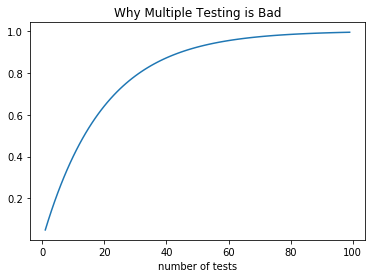

In [11]:
make_bonf_graph(0.05,100,bonf=False)

# Bonferroni Correction

<img src='abvenn.gif'>

P(A) + P(B) - P(A$\cap$B) $\Rightarrow$ 0.05 + 0.05 - ?

$\frac{0.05+0.05}{2}$ $\rightarrow$ new $\alpha$

# Bonferroni Correction

20 sample case

$\frac{\alpha}{n} = \frac{0.05}{20} = 0.0025$

$P$(one significant result) $=$ $1 - P$(no significant results)

$P$(one significant result) $=$ $1-(1-0.0025)^{20}$ $=$ $0.0488$

$\Rightarrow$ Bonferroni is slightly conservative. That's good.

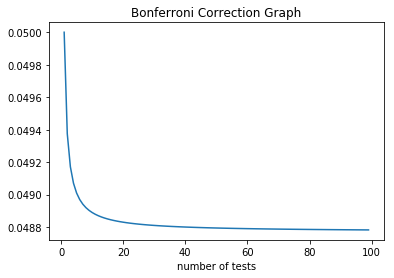

In [12]:
make_bonf_graph(0.05,100)

# Outline - Afternoon Lecture

- Know when to use a $\chi^2$ test
- Perform a $\chi^2$ test
- Understand experiment design
- Be aware of confounding factors

# Chi-Squared Test
# $$\chi^2$$

1. Estimating how closely an observed distribution matches an expected distribution - we'll refer to this as the goodness-of-fit test
2. Estimating whether two random variables are independent.




# Chi-Square Goodness of Fit Test

- How well does the expected model fit the data?

- This is for cases where the observations fall into **bins** and the chance that an observation falls into a bin is a certain percentage.
    - Bins might be hours, days, type of customer (premium, paid, free)
    
- ex. did the expected number of users of the app each day match reality?

# Goodness of Fit - Example

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

Dice Game: 


|Value  |Observed Frequency|Expected Frequency|
|-------|------------------|------------------|
|1      |16                |?                 |
|2	    |5	               |?                 |
|3	    |9	               |?                 |
|4	    |7	               |?                 |
|5	    |6	               |?                 |
|6	    |17	               |?                 |
|Total	|60	               |?                 |

# Goodness of Fit - Example

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

Dice Game: 


|Value  |Observed Frequency|Expected Frequency|
|-------|------------------|------------------|
|1      |16                |                10|
|2	    |5	               |10                |
|3	    |9	               |10                |
|4	    |7	               |10                |
|5	    |6	               |10                |
|6	    |17	               |10                |
|Total	|60	               |60                |

```obs_table = # use an np array
exp_table = #use an np array
chi2_stat = # use the chi2 formula
print "Chi2 Statistic: {}".format(chi2_stat)
print "Critical Chi2 Value: {:0.2f}".format(scs.chi2.ppf(0.95,5))```

In [13]:
obs_table = np.array([16,5,9,7,6,17])
exp_table = np.array([10,10,10,10,10,10])
chi2_stat = sum((exp_table - obs_table)**2/exp_table)
print("Chi2 Statistic: {}".format(chi2_stat))
print("Critical Chi2 Value: {:0.2f}".format(scs.chi2.ppf(0.95,5)))

Chi2 Statistic: 13.6
Critical Chi2 Value: 11.07


# Use Scipy!

In [14]:
obs_table = np.array([16,5,9,7,6,17])
exp_table = np.array([10,10,10,10,10,10])
scs.chisquare(obs_table,exp_table)

Power_divergenceResult(statistic=13.6, pvalue=0.018360196409519448)

“Delta degrees of freedom”: adjustment to the degrees of freedom for the p-value. The p-value is computed using a chi-squared distribution with k - 1 - ddof degrees of freedom, where k is the number of observed frequencies. The default value of ddof is 0.

# Independence Example

Question: Is voting behavior independent of gender?   (or, similarly, is churn behavior independent of operating system?)

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

**Actual**

|      |Repub| Dem  | Other |
| -----|-----|------|-------|
|Male  |26   |13    |5      |
|Female|20   |29    |7      |

# Independence Example

**Problem**: Is voting behavior independent of gender?

**Step 1**:

$H_0$: Voting behavior *independent* of gender

$H_1$: Voting behavior *not independent* of gender

**Step 2**:

choose level of significance $\alpha$

Let's say $\alpha = 0.05$

**Step 3**:

Let's look up our critical value in a $\chi^2$ table:

The critical value for $\chi^2$ with $\alpha = 0.05$ and 2 degrees of freedom ((rows - 1)(cols - 1)=2) is: 5.991

Is our $\chi^2$ value > critical value?

**Step 4**:

Reject or fail to reject null hypothesis

# Independence Example

Question: Is voting behavior independent of gender?

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

**Actual**

|      |Repub| Dem  | Other | Total |
| -----|-----|------|-------|-------|
|Male  |26   |13    |5      |44     |
|Female|20   |29    |7      |56     |
|Total |46   |42    |12     |100    |

**Actual**

|      |Repub| Dem  | Other | Total |
| -----|-----|------|-------|-------|
|Male  |26   |13    |5      |44     |
|Female|20   |29    |7      |56     |
|Total |46   |42    |12     |100    |
**Expected**

|      |Repub| Dem  | Other |
| -----|-----|------|-------|
|Male  |20.24|18.48 |5.28   |
|Female|25.76|23.52 |6.72   |

Ok, we now have actual and expected.  How far off are they?

Let's sum up the differences.  Are the differences too far off from expectation?

Critical value for 2 degrees of freedom = 5.991

# Use Scipy!

In [15]:
cont_table = np.array([[26,13,5],[20,29,7]])
print(scs.chi2_contingency(cont_table))
chi2,pval,dof,exp_array = scs.chi2_contingency(cont_table)
print("\nClean it up!\n")
print("Chi2 Value: {0}\np-value: {1}\ndof: {2}\nExpected Value Array:\n{3}".format(chi2,pval,dof,exp_array))

(5.8554993143502472, 0.05351733509077522, 2, array([[ 20.24,  18.48,   5.28],
       [ 25.76,  23.52,   6.72]]))

Clean it up!

Chi2 Value: 5.855499314350247
p-value: 0.05351733509077522
dof: 2
Expected Value Array:
[[ 20.24  18.48   5.28]
 [ 25.76  23.52   6.72]]


# Experimental vs. Observational

## Experimental
- Randomly assign groups to minimize confounding
- **Apply treatments** to experimental units and observe the effect of treatments
- **Can** be used to **establish causality**

## Observational
- Observe subjects and measure variables of interest **without assigning treatments** to subjects (self-selection)
- Confounding factors very likely and require adjustment
- **Cannot** be used to **establish causality**

## Homework example

# Experiment Design

## ++Removing all confounding variables is really hard++

## Randomize into groups
- ex. Assign people to groups based on a RNG

## Assume independent observations
- Knowledge of what other study participants are doing may bias the results

## Removing too many...

# Online Dating Confounder Discussion
<img src='okcab.png'>

# A/B Testing Example

<img src='twitab.png'>

jupyter nbconvert Hypothesis_Testing.ipynb --to slides --post serve